# Day 14 Group Worksheet - Solutions
Oct 28, 2024

If you're working on CoCalc, it's good to rename your notebook with a fun group name and to include your names below so that you can easily find it later for reference.

* Group members:

_Updated Oct 28 to fix some of Joss' silly counting errors_

## *Plinko*

Plinko is a game from the game show The Price is Right where a puck is placed into the top of a board with pegs in it. As the puck falls down the board, it hits the pegs and moves one place to the right or to the left with equal probability. Traditionally, If the puck hits the edge of the board, a bumper pushes it back to the last spot again. There are buckets at the bottom of the board for the puck to fall into with various prizes. But you can also play Plinko with a triangular board so the puck can never fall out 

## *Task 1: Triangular Plinko*

![Triangular Plinko](https://i.ibb.co/28pGMgb/triangular-plinko.png)

Use a Monte-Carlo simulation to simulate what happens on a Triangular Plinko board with 9 buckets, as shown above (image captured from https://phet.colorado.edu/sims/html/plinko-probability/latest/plinko-probability_en.html). 
* Create a final histogram that shows how many times the puck falls into each bin. 
* The results should follow a binomial distribution, so compare your results to the expected distribution.

Number of balls simulated: 10000

Simulated distribution:
Bucket 0: 0.007
Bucket 1: 0.054
Bucket 2: 0.163
Bucket 3: 0.277
Bucket 4: 0.271
Bucket 5: 0.164
Bucket 6: 0.055
Bucket 7: 0.008

Theoretical distribution:
Bucket 0: 0.008
Bucket 1: 0.055
Bucket 2: 0.164
Bucket 3: 0.273
Bucket 4: 0.273
Bucket 5: 0.164
Bucket 6: 0.055
Bucket 7: 0.008


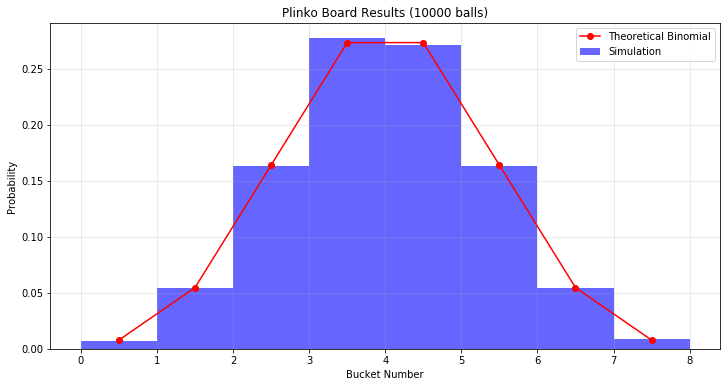

In [3]:
### Solution courtesy of Claude

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def simulate_single_ball():
    """
    Simulate a single ball's path through the Plinko board.
    For 8 buckets, we need 7 rows of pins.
    At each pin, the ball has a 50/50 chance of going left or right.
    """
    position = 0
    for _ in range(7):  # 7 rows for 8 buckets
        # 0 means go left, 1 means go right
        position += np.random.choice([0, 1])
    return position

def run_simulation(num_balls=10000):
    """
    Run the Plinko simulation for a specified number of balls
    """
    results = []
    for _ in range(num_balls):
        results.append(simulate_single_ball())
    return results

# Run simulation
num_balls = 10000
results = run_simulation(num_balls)

# Create histogram of results
plt.figure(figsize=(12, 6))

# Plot simulation results
plt.hist(results, bins=range(9), density=True, alpha=0.6, color='blue', label='Simulation')

# Calculate and plot theoretical binomial distribution
x = np.arange(8)
n = 7  # number of rows
p = 0.5  # probability of going right
theoretical = binom.pmf(x, n, p)
plt.plot(x + 0.5, theoretical, 'ro-', label='Theoretical Binomial')

plt.title(f'Plinko Board Results ({num_balls} balls)')
plt.xlabel('Bucket Number')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)

# Print statistics
print(f"Number of balls simulated: {num_balls}")
print("\nSimulated distribution:")
unique, counts = np.unique(results, return_counts=True)
for bucket, count in zip(unique, counts):
    print(f"Bucket {bucket}: {count/num_balls:.3f}")

print("\nTheoretical distribution:")
for bucket, prob in enumerate(theoretical):
    print(f"Bucket {bucket}: {prob:.3f}")

plt.show()

## *Task 2: Rectangular Plinko, with bumpers*
In The Price is Right version of Plinko, the board is rectangular in shape, with 9 possible start positions and 9 buckets. It uses bumpers on the walls so that for certain positions along the wall, the puck only has one choice of path instead of two, as shown below (image captured from https://games.washingtonpost.com/games/price-is-right-plinko)

![Plinko](https://i.ibb.co/sqqpg9G/plinko.png)

There are 9 possible starting positions, based on the spaces in-between adjacent pegs in the top row, and the left-most or right-most pegs and the wall. After passing through this first row of pegs (where no randomness has yet happened), the puck will encounter 12 subsequent rows of pegs where randomness will occur.

Build your Monte-Carlo simulation so that you can choose any starting position and then run $N$ simulations:

* Create a final histogram that shows how many times the puck falls into each bin. Show the results for at least three different starting positions.
* Calculate the expectation value (average winnings) for each possible starting position

Number of chips dropped: 10000
Average winnings per drop: $1758.39
Maximum single drop winning: $10000
Probability of hitting $10000: 13.500%

Bucket landing probabilities:
Bucket 0 ($100): 7.150%
Bucket 1 ($500): 10.640%
Bucket 2 ($1000): 14.220%
Bucket 3 ($0): 11.130%
Bucket 4 ($10000): 13.500%
Bucket 5 ($0): 11.460%
Bucket 6 ($1000): 14.660%
Bucket 7 ($500): 10.500%
Bucket 8 ($100): 6.740%

Expected value by starting position:
Position 0: $2937.96
Position 1: $245.06
Position 2: $2893.67
Position 3: $235.45
Position 4: $2817.95
Position 5: $232.50
Position 6: $3065.08
Position 7: $254.13
Position 8: $2965.31


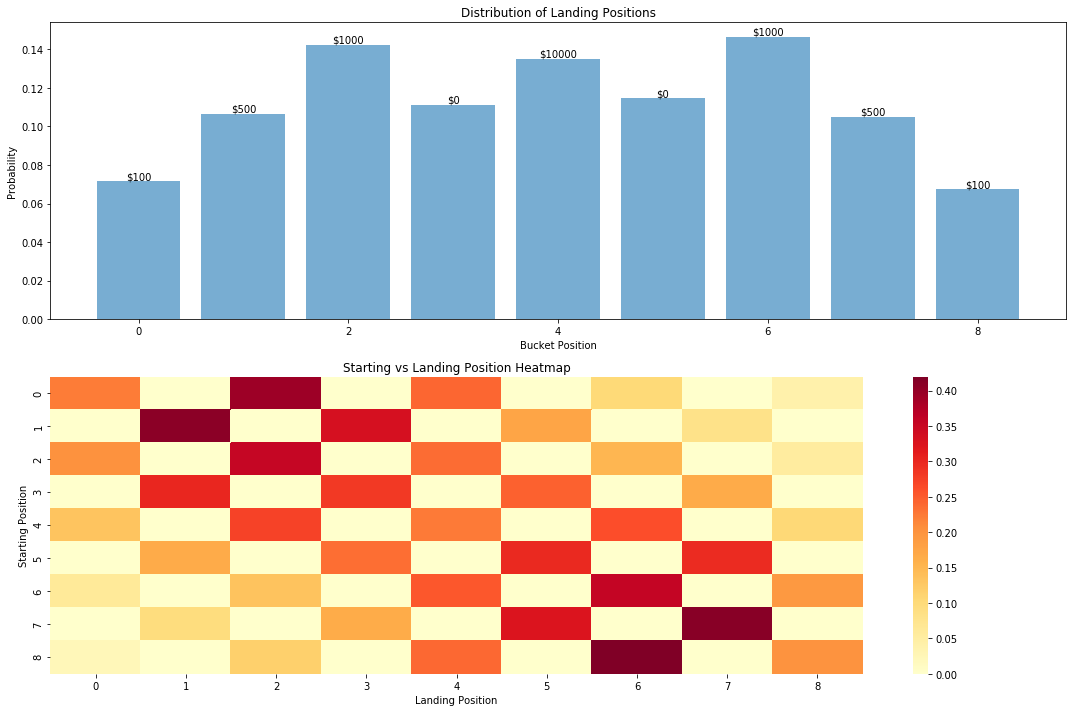

In [5]:
# Solution courtesy of Claude

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_drop(start_position):
    """
    Simulate a single chip drop from a given starting position
    start_position: 0-8 (left to right)
    """
    # Prize amounts in each bucket (from left to right)
    prizes = [100, 500, 1000, 0, 10000, 0, 1000, 500, 100]
    
    current_pos = start_position
    
    # The actual board has 12 rows of pegs
    for _ in range(12):
        # At edges, force the chip to move inward
        if current_pos == 0:
            current_pos += 1
        elif current_pos == 8:
            current_pos -= 1
        else:
            # Regular position: pure random left/right movement
            current_pos += np.random.choice([-1, 1])
    
    return current_pos, prizes[current_pos]

def run_simulation(num_drops=10000):
    """
    Run multiple drops and collect statistics
    """
    results = []
    winnings = []
    starting_positions = []
    
    for _ in range(num_drops):
        # Randomly choose starting position (0-8)
        start_pos = np.random.randint(0, 9)
        final_pos, prize = simulate_drop(start_pos)
        
        results.append(final_pos)
        winnings.append(prize)
        starting_positions.append(start_pos)
    
    return results, winnings, starting_positions

# Run simulation
num_drops = 10000
results, winnings, starting_positions = run_simulation(num_drops)

# Prize configuration
prizes = [100, 500, 1000, 0, 10000, 0, 1000, 500, 100]

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of landing positions
plt.subplot(2, 1, 1)
bucket_counts = np.zeros(9)
for pos in results:
    bucket_counts[pos] += 1

plt.bar(range(9), bucket_counts/num_drops, alpha=0.6)
plt.title('Distribution of Landing Positions')
plt.xlabel('Bucket Position')
plt.ylabel('Probability')
for i, prize in enumerate(prizes):
    plt.text(i, bucket_counts[i]/num_drops, f'${prize}', ha='center', va='bottom')

# Plot 2: Heatmap of starting position vs landing position
plt.subplot(2, 1, 2)
heatmap_data = np.zeros((9, 9))
for start, end in zip(starting_positions, results):
    heatmap_data[start, end] += 1

# Normalize by number of drops from each starting position
for i in range(9):
    total_from_pos = np.sum(heatmap_data[i, :])
    if total_from_pos > 0:
        heatmap_data[i, :] /= total_from_pos

sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('Starting vs Landing Position Heatmap')
plt.xlabel('Landing Position')
plt.ylabel('Starting Position')

plt.tight_layout()

# Print statistics
print(f"Number of chips dropped: {num_drops}")
print(f"Average winnings per drop: ${np.mean(winnings):.2f}")
print(f"Maximum single drop winning: ${max(winnings)}")
print(f"Probability of hitting $10000: {(np.array(winnings) == 10000).sum() / num_drops:.3%}")

# Bucket statistics
print("\nBucket landing probabilities:")
for i, (count, prize) in enumerate(zip(bucket_counts, prizes)):
    print(f"Bucket {i} (${prize}): {count/num_drops:.3%}")

# Calculate expected value for each starting position
print("\nExpected value by starting position:")
for start_pos in range(9):
    start_pos_drops = [w for w, s in zip(winnings, starting_positions) if s == start_pos]
    if start_pos_drops:
        exp_value = np.mean(start_pos_drops)
        print(f"Position {start_pos}: ${exp_value:.2f}")

plt.show()